In [1]:
''' import '''
import scipy.io as io
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
''' load data '''
data = io.loadmat('./data/hw3_prob1a.mat')

A = data['A']
b = data['b']
x_orig = data['x_orig']

M, N = A.shape

In [3]:
''' hyper param '''
LAMBDA = 2
MAXITERS = 10000
CRIT = 1e-4

t = 1/la.norm(A, 2)**2 # step size

In [4]:
''' function '''
def soft_thres(z, t):
    return np.sign(z)*np.maximum(np.abs(z) - t, 0)

In [5]:
''' soft-threshold (ISTA) '''

f_hist_ista = []
xcond_hist_ista = []

x = np.zeros((N, 1))

for k in range(MAXITERS):

    # f
    f = 1/2*la.norm(A@x - b, 2)**2 + LAMBDA*la.norm(x, 1)   # f(x) = g(x) + h(x)
    grad_g = A.T@(A@x - b)

    # update x
    x = soft_thres(x - t*grad_g, LAMBDA*t)

    # stop condition
    if (k >= 1) and (la.norm(x - x_prev, 2)/la.norm(x, 2) < CRIT):
        break
    
    x_prev = x

    # history
    f_hist_ista.append(f)
    xcond_hist_ista.append(la.norm(x - x_orig, 2))

    print(f'i = {k}, f = {f}')

# optimal
x_ista = x

i = 0, f = 115126.37855840038
i = 1, f = 21688.01678888902
i = 2, f = 12325.371859624725
i = 3, f = 10481.398722573573
i = 4, f = 9929.309787572352
i = 5, f = 9675.41237659618
i = 6, f = 9508.554795506128
i = 7, f = 9374.765766748154
i = 8, f = 9257.860867608055
i = 9, f = 9151.37915416026
i = 10, f = 9051.949042361199
i = 11, f = 8957.513966822755
i = 12, f = 8868.388660871522
i = 13, f = 8784.313214584028
i = 14, f = 8703.841506773055
i = 15, f = 8627.560407035724
i = 16, f = 8555.055213041349
i = 17, f = 8485.814037977616
i = 18, f = 8419.727844992487
i = 19, f = 8356.48534292882
i = 20, f = 8295.712308714155
i = 21, f = 8237.311080755306
i = 22, f = 8181.122041798084
i = 23, f = 8126.746878940047
i = 24, f = 8074.364100815005
i = 25, f = 8024.258719969394
i = 26, f = 7975.770176064399
i = 27, f = 7928.730525697118
i = 28, f = 7882.847189970477
i = 29, f = 7838.423219944794
i = 30, f = 7796.132341702655
i = 31, f = 7755.2262764877
i = 32, f = 7715.420805531156
i = 33, f = 7676.79657

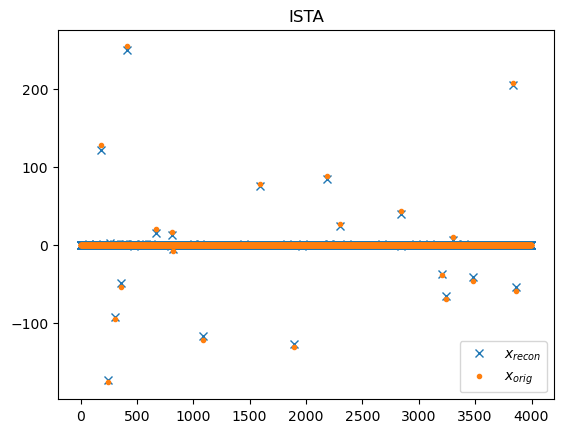

In [6]:
plt.title('ISTA')
plt.plot(x_ista, linestyle='', marker='x', label='$x_{recon}$')
plt.plot(x_orig, linestyle='', marker='.', label='$x_{orig}$')
plt.legend()
plt.show()

In [7]:
''' FISTA '''

f_hist_fista = []
xcond_hist_fista = []

x = np.zeros((N, 1))
y = x

for k in range(MAXITERS):

    # f
    f = 1/2*la.norm(A@x - b)**2 + LAMBDA*la.norm(x, 1)
    grad_gy = A.T@(A@y - b)

    # update x, y
    x = soft_thres(y - t*grad_gy, LAMBDA*t)
    y = x + k/(k+3)*(x - x_prev)

    # stop condition
    if (k >= 1) and (la.norm(x - x_prev, 2)/la.norm(x, 2) < CRIT):
        break
    
    x_prev = x
    
    # history
    f_hist_fista.append(f)
    xcond_hist_fista.append(la.norm(x - x_orig, 2))

    print(f'i = {k}, f = {f}')

# optimal
x_fista = x

i = 0, f = 115126.3785584004
i = 1, f = 21688.01678888902
i = 2, f = 12325.371859624725
i = 3, f = 10213.797085782748
i = 4, f = 9695.527625108596
i = 5, f = 9436.577462282137
i = 6, f = 9206.354887225658
i = 7, f = 8982.542956637652
i = 8, f = 8765.000307193073
i = 9, f = 8555.930608165274
i = 10, f = 8357.361159504528
i = 11, f = 8168.4996172922765
i = 12, f = 7989.103769428676
i = 13, f = 7819.026761329501
i = 14, f = 7661.3118220586
i = 15, f = 7510.886401786607
i = 16, f = 7367.477281648942
i = 17, f = 7233.008858487151
i = 18, f = 7104.708377065758
i = 19, f = 6983.50228396366
i = 20, f = 6869.3688281122
i = 21, f = 6764.495031684111
i = 22, f = 6667.041292618906
i = 23, f = 6574.9287280146345
i = 24, f = 6487.889133861245
i = 25, f = 6405.7376923016345
i = 26, f = 6326.543276926754
i = 27, f = 6252.273805979441
i = 28, f = 6183.039083176151
i = 29, f = 6115.744558973161
i = 30, f = 6051.369052270965
i = 31, f = 5990.031250795515
i = 32, f = 5931.16636031046
i = 33, f = 5874.2890

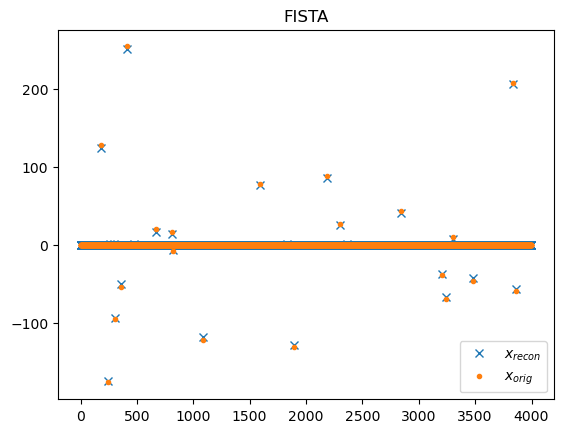

In [8]:
plt.title('FISTA')
plt.plot(x_fista, linestyle='', marker='x', label='$x_{recon}$')
plt.plot(x_orig, linestyle='', marker='.', label='$x_{orig}$')
plt.legend()
plt.show()

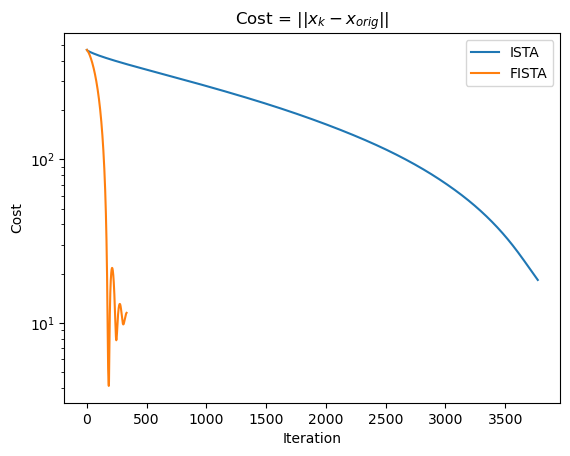

In [9]:
plt.title('Cost = $||x_k - x_{orig}||$')
plt.semilogy(xcond_hist_ista, label='ISTA')
plt.semilogy(xcond_hist_fista, label='FISTA')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()